In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm  


IMAGE_FOLDER = r"C:\Users\mcsmu\Desktop\Line Following SVM\processed_dataset"  
OUTPUT_CSV = "floating_labels.csv"

#line Color 
LOWER_HSV = np.array([70, 50, 50])
UPPER_HSV = np.array([100, 255, 255])

# calculate floating-point maneuvering value
def calculate_steering_label(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None

    height, width, _ = image.shape

    # Crop lower 40% of the image 
    roi = image[int(height * 0.6):, :]
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, LOWER_HSV, UPPER_HSV)

    # Get coordinates of the detected line
    points = cv2.findNonZero(mask)
    if points is None:
        return None  # No line detected

    avg_x = np.mean(points[:, 0, 0])  # Average x-coordinate

    # Normalize X to range [-1.0, +1.0]
    normalized = (avg_x - (width / 2)) / (width / 2)
    normalized = np.clip(normalized, -1.0, 1.0)

    return round(float(normalized), 4)

# === Process All Images ===
image_paths = sorted(glob(os.path.join(IMAGE_FOLDER, "*.png")))
labels = []

for path in tqdm(image_paths, desc="Labeling images"):
    label = calculate_steering_label(path)
    if label is not None:
        filename = os.path.basename(path)
        labels.append([filename, label])

# === Create DataFrame and Rename Column ===
df = pd.DataFrame(labels, columns=["filename", "Maneuvering"])

# === Save to CSV ===
df.to_csv(OUTPUT_CSV, index=False)

# === Preview result ===
df.head()


Labeling images: 100%|███████████████████████████████████████████████████████████████| 796/796 [01:39<00:00,  8.01it/s]


,filename,Maneuvering
0,00815481.png,0.0575
1,00815521.png,0.2637
2,00815561.png,0.7458
3,00815602.png,0.2350
4,00815766.png,0.4147


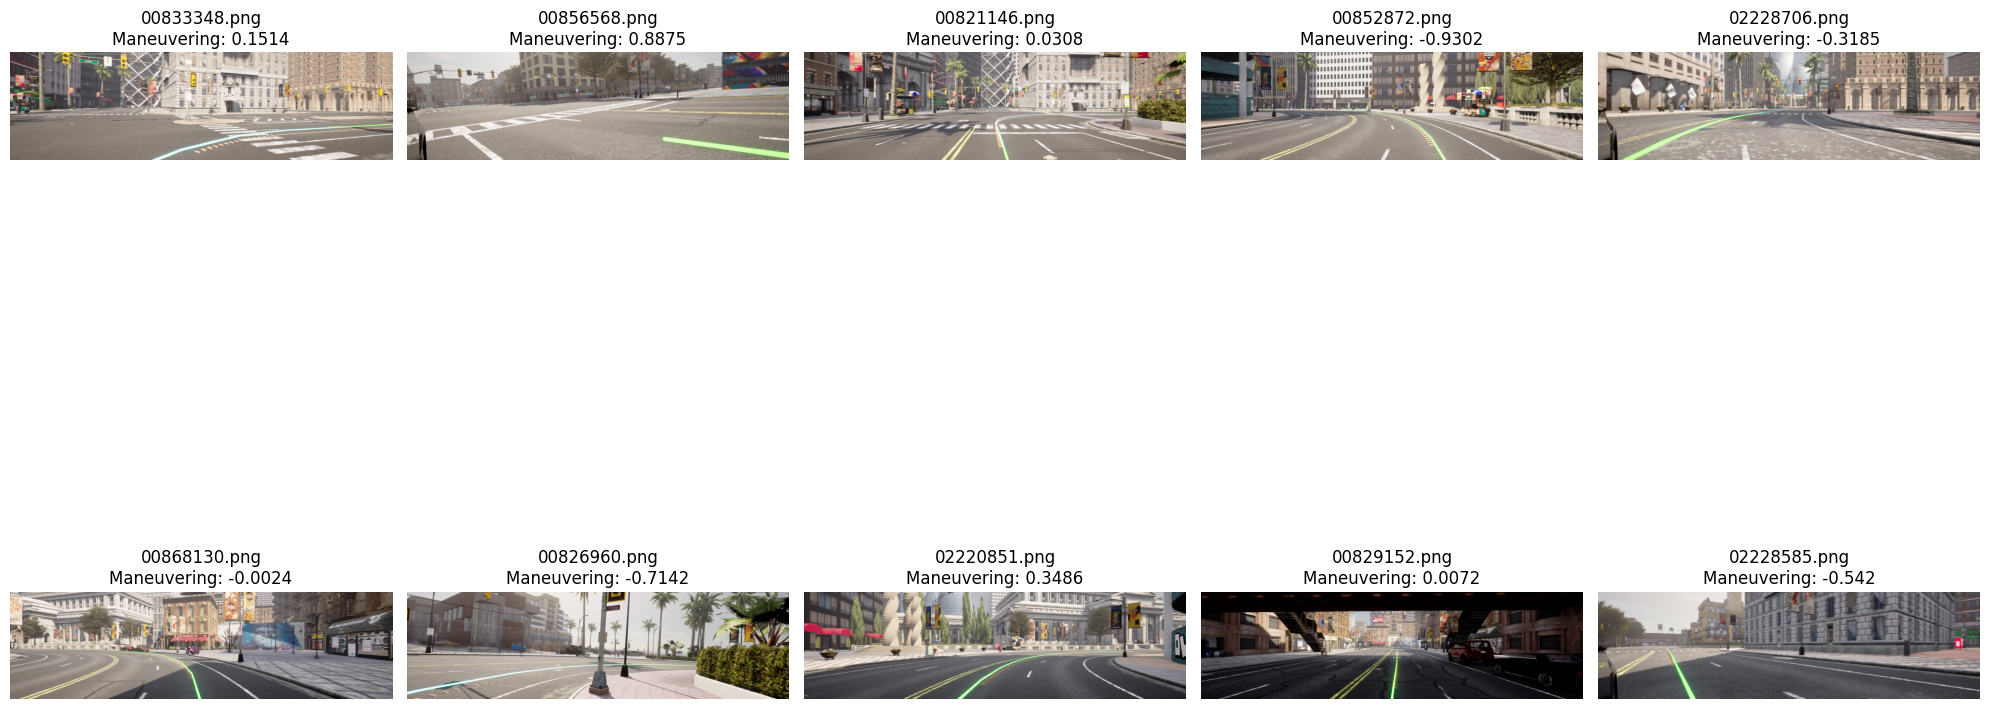

In [6]:
import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os


IMAGE_FOLDER = r"C:\Users\mcsmu\Desktop\Line Following SVM\processed_dataset"  
CSV_FILE = "floating_labels.csv"


df = pd.read_csv(CSV_FILE)


sampled_df = df.sample(n=10, random_state=42)


plt.figure(figsize=(20, 15))

for i, row in enumerate(sampled_df.itertuples(), 1):
    image_path = os.path.join(IMAGE_FOLDER, row.filename)
    img = cv2.imread(image_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i)
        plt.imshow(img)
        plt.title(f"{row.filename}\nManeuvering: {row.Maneuvering}")
        plt.axis("off")

plt.tight_layout()
plt.show()
